## Gradient Descent Code-Along

Let's walk through how gradient descent works using code.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Set a random seed.
np.random.seed(42)

In [32]:
# Randomly generate data from a Poisson(45) distribution.
temp = np.random.poisson(45, 100)

In [33]:
# View array.
temp

array([42, 50, 37, 47, 52, 38, 41, 44, 47, 41, 44, 38, 47, 47, 41, 49, 36,
       40, 41, 46, 58, 47, 34, 29, 43, 52, 40, 37, 51, 49, 51, 42, 53, 42,
       41, 50, 55, 36, 50, 51, 45, 41, 56, 43, 39, 41, 57, 48, 52, 55, 41,
       39, 43, 36, 59, 45, 63, 45, 40, 47, 30, 56, 37, 48, 39, 42, 48, 34,
       41, 49, 45, 48, 49, 58, 42, 40, 52, 46, 55, 42, 48, 47, 35, 46, 48,
       49, 41, 48, 48, 34, 40, 55, 51, 46, 38, 40, 48, 56, 44, 41])

In [34]:
# Calculate mean and sample variance of array.
print(np.mean(temp))
print(np.var(temp, ddof = 1))

45.18
45.07838383838384


**Ohio State Fun Facts:**
1. Ohio Stadium can seat 104,944 people. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Ohio_Stadium).)
2. Ohio Stadium's record attendance is 110,045 people. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Ohio_Stadium).)
3. Ohio State is better than Michigan. (Source: It's just a fact.)
4. Ohio State students enjoy soda. (Source: first-hand knowledge.)

In [35]:
# sodas ~ N(200000 + 1000 * temp, 20000)
sodas_sold = 200000 + 1000 * temp + np.round(np.random.normal(0, 20000, 100))

In [36]:
sodas_sold

array([233070., 267128., 241282., 222085., 255464., 245706., 223323.,
       247075., 248164., 218141., 251156., 249216., 268661., 268076.,
       213447., 230243., 246301., 250276., 251301., 323055., 269418.,
       269711., 253080., 242028., 236695., 267179., 224543., 232264.,
       241293., 250637., 297293., 204655., 266725., 209746., 231561.,
       271779., 256286., 214445., 235694., 264592., 230393., 245329.,
       256911., 229968., 281879., 253678., 216497., 251729., 238764.,
       272049., 225150., 236705., 253100., 253315., 234994., 238310.,
       253501., 231933., 275309., 255100., 204782., 274357., 279443.,
       268649., 208613., 232315., 273338., 219847., 249876., 264493.,
       226461., 246809., 184175., 237512., 236949., 215044., 284648.,
       217397., 246199., 244615., 276825., 218283., 258263., 246205.,
       228370., 258242., 244981., 235996., 249396., 226294., 242270.,
       268243., 282720., 221244., 280661., 200958., 244964., 267766.,
       249620., 2285

$$ \text{sodas_sold}_i = 200000 + 1000 * \text{temp}_i + \varepsilon_i $$

In [37]:
# Create dataframe with temp and sodas_sold.
df = pd.DataFrame({'temp': temp,
                   'sodas': sodas_sold})

In [38]:
# Check the first five rows.
df.head()

,temp,sodas
0,42,233070.0
1,50,267128.0
2,37,241282.0
3,47,222085.0
4,52,255464.0


#### Our goal is to fit a model here.
- You and I know that our $y$-intercept $\beta_0$ is 200,000.
- You and I know that our slope $\beta_1$ is 1,000.
- However, our computer does not know that. Our computer has to estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ from the data.
    - We might say that our **machine** has to... **learn**.

#### Our workflow:
1. Instantiate model.
2. Select a learning rate $\alpha$.
3. Select a starting point $\hat{\beta}_{1,0}$.
4. Calculate the gradient of the loss function.
5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.
6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.
7. Repeat steps 4 through 6 until "stopping condition" is met.

#### Step 1. Instantiate model.

Our model takes on the form:
$$ Y = \beta_0 + \beta_1 X + \varepsilon$$

#### Step 2. Select a learning rate $\alpha$.

$$\alpha = 0.1$$

In [39]:
alpha = 0.1

#### Step 3. Select a starting point.
The zero-th iteration of $\hat{\beta}_1$ is going to start at, say, 20.
$$\hat{\beta}_{1,0} = 20$$

Two points:
- You and I know that the true value of $\beta_1$ is 1000. We need the computer to figure (machine to learn) that part out!
- We're going to pretend like the computer already knows the value for $\beta_0$. In reality, we'd have to do this for $\beta_0$ and for $\beta_1$ at the same time.

In [40]:
beta_1 = 20

#### Step 4. Calculate the gradient of the loss function with respect to parameter $\beta_1$.

The loss function, $L$, is our mean square error.

$$L = \frac{1}{n}\sum_{i = 1} ^ n (y_i - \hat{y}_i)^2 $$

$$\Rightarrow L = \frac{1}{n}\sum_{i = 1} ^ n \left(y_i - \left(\hat{\beta}_0 + \hat{\beta}_1x_i\right)\right)^2 $$

The gradient of this loss function with respect to $\beta_1$ is:

$$\frac{\partial L}{\partial \beta_1} = \frac{2}{n} \sum_{i=1}^n -x_i\left(y_i - \left(\hat{\beta}_1x_i + \hat{\beta}_0\right)\right) $$

In [41]:
# Calculate gradient of beta_1.
def beta_1_gradient(x, y, beta_1, beta_0):
    n = len(x)
    # Start gradient at 0.
    gradient = 0
    # Begin summation.
    for i in range(n):
        # Add gradient for each observation.
        gradient += -1 * x[i] * (y[i] - (beta_1 * x[i] + beta_0))
    # Multiply gradient by 2 / n.
    gradient *= (2 / n)
    return gradient

In [42]:
# Calculate gradient of beta_1.
def beta_0_gradient(x, y, beta_1, beta_0):
    n = len(x)
    # Start gradient at 0.
    gradient = 0
    # Begin summation.
    for i in range(n):
        # Add gradient for each observation.
        gradient += -1 * (y[i] - (beta_1 * x[i] + beta_0))
    # Multiply gradient by 2 / n.
    gradient *= (2 / n)
    return gradient

#### Step 5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.

In [43]:
# Define function to calculate new value of beta_1.
def update_beta_1(beta_1, alpha, gradient):
    beta_1 = beta_1 - alpha * gradient
    return beta_1

In [44]:
# Define function to calculate new value of beta_1.
def update_beta_0(beta_0, alpha, gradient):
    beta_0 = beta_0 - alpha * gradient
    return beta_0

#### Step 6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.

In [45]:
def check_update(beta_1, updated_beta_1, tolerance = 0.1):
    if abs(beta_1 - updated_beta_1) < tolerance:
        return True
    else:
        return False

In [46]:
def check_update_beta_0(beta_0, updated_beta_0, tolerance = 0.1):
    if abs(beta_0 - updated_beta_0) < tolerance:
        return True
    else:
        return False

#### Step 7: Save final value of $\hat{\beta}_1$.

#### Putting it all together...

In [123]:
def gradient_descent(x, y, beta_1 = 0, beta_0=200000, alpha = 0.01, max_iter = 1000):
    # Set converged = False.
    converged = False
    cost_history = np.zeros(max_iter)
    # Iterate through our observations.
    for i in range(max_iter):
        
        # Calculate gradient.
        gradient = beta_1_gradient(x, y, beta_1, beta_0)
        
        # Update beta_1.
        updated_beta_1 = update_beta_1(beta_1, alpha, gradient)
        
        # Check for convergence.
        converged = check_update(beta_1, updated_beta_1)
        

        # Overwrite beta_1.
        beta_1 = updated_beta_1
        
        cost_history[i] = np.mean(np.square(y - beta_0 - beta_1*x))
        
        # If we've converged, let us know!
        if (converged == True):
            print(f'Our algorithm converged after {i} iterations with a beta_1 value of {beta_1}.')
            break
        print(f'Iteration {i} with beta_1 value of {beta_1}.')
        
    # If we didn't converge by the end of our loop, let us know!
    if converged == False:
        print("Our algorithm did not converge, so do not trust the value of beta_1.")    
    
    # Return beta_1.
    return beta_1, cost_history

In [124]:
def gradient_descent_both(x, y, beta_1 = 0, beta_0=0, alpha = 0.01, alpha_beta_0=0.1, max_iter = 1000):
    # Set converged = False.
    converged = False
    converged_beta_0 = False
    cost_history = np.zeros(max_iter)
    # Iterate through our observations.
    for i in range(max_iter):
        
        # Calculate gradient.
        gradient = beta_1_gradient(x, y, beta_1, beta_0)
        gradient_0 = beta_0_gradient(x, y, beta_1, beta_0)
        
        # Update beta_1.
        updated_beta_1 = update_beta_1(beta_1, alpha, gradient)
        updated_beta_0 = update_beta_0(beta_0, alpha_beta_0, gradient_0)
        
        # Check for convergence.
        converged = check_update(beta_1, updated_beta_1)
        converged_beta_0 = check_update_beta_0(beta_0, updated_beta_0)

        # Overwrite beta_1.
        beta_1 = updated_beta_1
        beta_0 = updated_beta_0
        
        cost_history[i] = np.mean(np.square(y - beta_0 - beta_1*x))
        
        # If we've converged, let us know!
        if (converged == True) & (converged_beta_0==True):
            print(f'Our algorithm converged after {i} iterations with a beta_1 value of {beta_1}.')
            break
        print(f'Iteration {i} with beta_1 value of {beta_1}.')
        print(f'Iteration {i} with beta_0 value of {beta_0}.')
        
    # If we didn't converge by the end of our loop, let us know!
    if converged == False:
        print("Our algorithm did not converge, so do not trust the value of beta_1.")    
    if converged_beta_0 == False:
        print("Our algorithm did not converge, so do not trust the value of beta_0.")
    
    # Return beta_1.
    return beta_1,beta_0,cost_history

In [125]:
# Call gradient_descent with an initial beta_1 of 20, alpha of 0.01, and 100 iterations.
beta_0 , cost_01 = gradient_descent(df['temp'],
                 df['sodas'],
                 beta_1 = 0,
                 alpha = 0.01,
                 max_iter = 100)

Iteration 0 with beta_1 value of 42249.8804.
Iteration 1 with beta_1 value of -1678046.9498228806.
Iteration 2 with beta_1 value of 68367623.14572819.
Iteration 3 with beta_1 value of -2783695935.2688437.
Iteration 4 with beta_1 value of 113344346385.40901.
Iteration 5 with beta_1 value of -4615064378394.096.
Iteration 6 with beta_1 value of 187912499350197.9.
Iteration 7 with beta_1 value of -7651270818499629.0.
Iteration 8 with beta_1 value of 3.115383241710553e+17.
Iteration 9 with beta_1 value of -1.2684968252937654e+19.
Iteration 10 with beta_1 value of 5.164963893485131e+20.
Iteration 11 with beta_1 value of -2.1030286784381265e+22.
Iteration 12 with beta_1 value of 8.562943930570083e+23.
Iteration 13 with beta_1 value of -3.4865910060980806e+25.
Iteration 14 with beta_1 value of 1.419642233134967e+27.
Iteration 15 with beta_1 value of -5.780385673500311e+28.
Iteration 16 with beta_1 value of 2.3536111954504697e+30.
Iteration 17 with beta_1 value of -9.583245776739587e+31.
Iterat

/Users/gateam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square


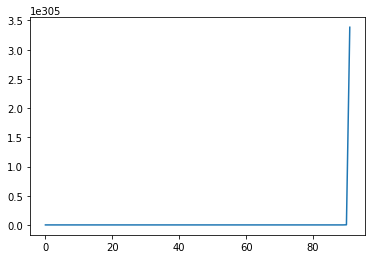

In [128]:
plt.plot(list(range(100)),cost_01)

<details><summary>What should we do?</summary>

- We **should not** adjust our maximum iterations. It doesn't look like we'll converge.
- We should adjust our alpha!
</details>

In [129]:
beta_0 , cost_001 =gradient_descent(df['temp'],
                 df['sodas'],
                 beta_1 = 0,
                 alpha = 0.0001,
                 max_iter = 100)

Iteration 0 with beta_1 value of 422.498804.
Iteration 1 with beta_1 value of 668.742936937712.
Iteration 2 with beta_1 value of 812.2609124495327.
Iteration 3 with beta_1 value of 895.9072070811362.
Iteration 4 with beta_1 value of 944.6586096886845.
Iteration 5 with beta_1 value of 973.0722921676366.
Iteration 6 with beta_1 value of 989.6325818994794.
Iteration 7 with beta_1 value of 999.2843824433098.
Iteration 8 with beta_1 value of 1004.9097220506694.
Iteration 9 with beta_1 value of 1008.1883274833475.
Iteration 10 with beta_1 value of 1010.0991905304644.
Iteration 11 with beta_1 value of 1011.2128950184895.
Iteration 12 with beta_1 value of 1011.8619931778362.
Iteration 13 with beta_1 value of 1012.2403057598519.
Iteration 14 with beta_1 value of 1012.460796925403.
Iteration 15 with beta_1 value of 1012.5893053504387.
Our algorithm converged after 16 iterations with a beta_1 value of 1012.6642036587855.


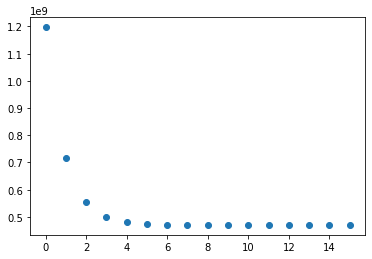

In [131]:
plt.scatter(list(range(16)),cost_001[:16])

In [132]:
beta_0_f, beta_1_f, cost_history = gradient_descent_both(df['temp'],
                 df['sodas'],
                 beta_1 = 0,
                 beta_0 = 10,
                 alpha = 0.0001,
                 alpha_beta_0 = 0.1,
                 max_iter = 3000)

Iteration 0 with beta_1 value of 2229.6084440000004.
Iteration 0 with beta_0 value of 49153.554000000004.
Iteration 1 with beta_1 value of 3085.025520255632.
Iteration 1 with beta_0 value of 68321.655300016.
Iteration 2 with beta_1 value of 3410.3835806286047.
Iteration 2 with beta_0 value of 75926.58763898292.
Iteration 3 with beta_1 value of 3531.293199624759.
Iteration 3 with beta_0 value of 79070.59807662627.
Iteration 4 with beta_1 value of 3573.353432730504.
Iteration 4 with beta_0 value of 80493.26710949169.
Iteration 5 with beta_1 value of 3585.0120768900874.
Iteration 5 with beta_0 value of 81251.34606944052.
Iteration 6 with beta_1 value of 3584.957059666231.
Iteration 6 with beta_0 value of 81752.46172877359.
Iteration 7 with beta_1 value of 3580.396912989952.
Iteration 7 with beta_0 value of 82153.8513918748.
Iteration 8 with beta_1 value of 3574.112174827127.
Iteration 8 with beta_0 value of 82516.16860772263.
Iteration 9 with beta_1 value of 3567.1753550907633.
Iteration 

Iteration 86 with beta_1 value of 3060.4853859014015.
Iteration 86 with beta_0 value of 106110.57162130698.
Iteration 87 with beta_1 value of 3054.6202553240123.
Iteration 87 with beta_0 value of 106379.46535004053.
Iteration 88 with beta_1 value of 3048.772169267017.
Iteration 88 with beta_0 value of 106647.57765292465.
Iteration 89 with beta_1 value of 3042.94107819773.
Iteration 89 with beta_0 value of 106914.91080084296.
Iteration 90 with beta_1 value of 3037.1269327274094.
Iteration 90 with beta_0 value of 107181.46705807968.
Iteration 91 with beta_1 value of 3031.3296836108425.
Iteration 91 with beta_0 value of 107447.24868233888.
Iteration 92 with beta_1 value of 3025.5492817459262.
Iteration 92 with beta_0 value of 107712.25792476353.
Iteration 93 with beta_1 value of 3019.785678173251.
Iteration 93 with beta_0 value of 107976.49702995464.
Iteration 94 with beta_1 value of 3014.0388240756897.
Iteration 94 with beta_0 value of 108239.9682359902.
Iteration 95 with beta_1 value of

Iteration 163 with beta_1 value of 2655.306095230947.
Iteration 163 with beta_0 value of 124686.48716767122.
Iteration 164 with beta_1 value of 2650.6184468241854.
Iteration 164 with beta_0 value of 124901.39785763015.
Iteration 165 with beta_1 value of 2645.9444210841.
Iteration 165 with beta_0 value of 125115.68400060077.
Iteration 166 with beta_1 value of 2641.2839784221756.
Iteration 166 with beta_0 value of 125329.34741156468.
Iteration 167 with beta_1 value of 2636.637079364941.
Iteration 167 with beta_0 value of 125542.38990022897.
Iteration 168 with beta_1 value of 2632.003684553641.
Iteration 168 with beta_0 value of 125754.81327104157.
Iteration 169 with beta_1 value of 2627.383754743898.
Iteration 169 with beta_0 value of 125966.61932320656.
Iteration 170 with beta_1 value of 2622.777250805382.
Iteration 170 with beta_0 value of 126177.80985069938.
Iteration 171 with beta_1 value of 2618.1841337214796.
Iteration 171 with beta_0 value of 126388.38664228207.
Iteration 172 with

Iteration 264 with beta_1 value of 2244.4950779899527.
Iteration 264 with beta_0 value of 143520.59576477463.
Iteration 265 with beta_1 value of 2241.0012779842245.
Iteration 265 with beta_0 value of 143680.77308710248.
Iteration 266 with beta_1 value of 2237.517631229932.
Iteration 266 with beta_0 value of 143840.48492181653.
Iteration 267 with beta_1 value of 2234.0441082209445.
Iteration 267 with beta_0 value of 143999.73262165955.
Iteration 268 with beta_1 value of 2230.580679536881.
Iteration 268 with beta_0 value of 144158.51753544318.
Iteration 269 with beta_1 value of 2227.1273158428567.
Iteration 269 with beta_0 value of 144316.8410080593.
Iteration 270 with beta_1 value of 2223.6839878892365.
Iteration 270 with beta_0 value of 144474.7043804914.
Iteration 271 with beta_1 value of 2220.250666511388.
Iteration 271 with beta_0 value of 144632.10898982597.
Iteration 272 with beta_1 value of 2216.827322629432.
Iteration 272 with beta_0 value of 144789.05616926387.
Iteration 273 wi

Iteration 358 with beta_1 value of 1956.7509962678894.
Iteration 358 with beta_0 value of 156712.5576545113.
Iteration 359 with beta_1 value of 1954.0934026866573.
Iteration 359 with beta_0 value of 156834.3981213324.
Iteration 360 with beta_1 value of 1951.4435322766994.
Iteration 360 with beta_0 value of 156955.8845103893.
Iteration 361 with beta_1 value of 1948.8013625938866.
Iteration 361 with beta_0 value of 157077.01785065918.
Iteration 362 with beta_1 value of 1946.1668712593134.
Iteration 362 with beta_0 value of 157197.799168129.
Iteration 363 with beta_1 value of 1943.5400359591097.
Iteration 363 with beta_0 value of 157318.22948580404.
Iteration 364 with beta_1 value of 1940.9208344442507.
Iteration 364 with beta_0 value of 157438.30982371673.
Iteration 365 with beta_1 value of 1938.3092445303694.
Iteration 365 with beta_0 value of 157558.04119893513.
Iteration 366 with beta_1 value of 1935.7052440975683.
Iteration 366 with beta_0 value of 157677.42462557167.
Iteration 367 w

Iteration 437 with beta_1 value of 1768.9152110761208.
Iteration 437 with beta_0 value of 165324.10756006953.
Iteration 438 with beta_1 value of 1766.803482728285.
Iteration 438 with beta_0 value of 165420.9222007718.
Iteration 439 with beta_1 value of 1764.697891225387.
Iteration 439 with beta_0 value of 165517.45549068466.
Iteration 440 with beta_1 value of 1762.598418733283.
Iteration 440 with beta_0 value of 165613.70824743513.
Iteration 441 with beta_1 value of 1760.5050474696582.
Iteration 441 with beta_0 value of 165709.68128627416.
Iteration 442 with beta_1 value of 1758.4177597038727.
Iteration 442 with beta_0 value of 165805.3754200835.
Iteration 443 with beta_1 value of 1756.336537756814.
Iteration 443 with beta_0 value of 165900.7914593826.
Iteration 444 with beta_1 value of 1754.2613640007473.
Iteration 444 with beta_0 value of 165995.93021233552.
Iteration 445 with beta_1 value of 1752.1922208591639.
Iteration 445 with beta_0 value of 166090.79248475767.
Iteration 446 wit

Iteration 515 with beta_1 value of 1621.3434524137178.
Iteration 515 with beta_0 value of 172089.70636795828.
Iteration 516 with beta_1 value of 1619.6605789425114.
Iteration 516 with beta_0 value of 172166.85965835626.
Iteration 517 with beta_1 value of 1617.9825960309988.
Iteration 517 with beta_0 value of 172243.7887353605.
Iteration 518 with beta_1 value of 1616.3094894668377.
Iteration 518 with beta_0 value of 172320.4942505523.
Iteration 519 with beta_1 value of 1614.6412450789876.
Iteration 519 with beta_0 value of 172396.97685361948.
Iteration 520 with beta_1 value of 1612.9778487375906.
Iteration 520 with beta_0 value of 172473.23719236185.
Iteration 521 with beta_1 value of 1611.3192863538509.
Iteration 521 with beta_0 value of 172549.2759126966.
Iteration 522 with beta_1 value of 1609.6655438799157.
Iteration 522 with beta_0 value of 172625.09365866389.
Iteration 523 with beta_1 value of 1608.0166073087566.
Iteration 523 with beta_0 value of 172700.69107243218.
Iteration 524

Iteration 590 with beta_1 value of 1507.787754183812.
Iteration 590 with beta_0 value of 177295.7993462956.
Iteration 591 with beta_1 value of 1506.4348823023158.
Iteration 591 with beta_0 value of 177357.82333023153.
Iteration 592 with beta_1 value of 1505.085941970522.
Iteration 592 with beta_0 value of 177419.6670677015.
Iteration 593 with beta_1 value of 1503.7409217630448.
Iteration 593 with beta_0 value of 177481.33108251556.
Iteration 594 with beta_1 value of 1502.3998102877013.
Iteration 594 with beta_0 value of 177542.81589696158.
Iteration 595 with beta_1 value of 1501.0625961854155.
Iteration 595 with beta_0 value of 177604.1220318096.
Iteration 596 with beta_1 value of 1499.729268130122.
Iteration 596 with beta_0 value of 177665.25000631626.
Iteration 597 with beta_1 value of 1498.399814828669.
Iteration 597 with beta_0 value of 177726.20033822922.
Iteration 598 with beta_1 value of 1497.0742250207243.
Iteration 598 with beta_0 value of 177786.9735437915.
Iteration 599 with

Iteration 672 with beta_1 value of 1408.9526408235456.
Iteration 672 with beta_0 value of 181827.01000061526.
Iteration 673 with beta_1 value of 1407.886991380346.
Iteration 673 with beta_0 value of 181875.86593801065.
Iteration 674 with beta_1 value of 1406.82443879636.
Iteration 674 with beta_0 value of 181924.5798962957.
Iteration 675 with beta_1 value of 1405.7649740718768.
Iteration 675 with beta_0 value of 181973.15228807266.
Iteration 676 with beta_1 value of 1404.7085882333395.
Iteration 676 with beta_0 value of 182021.58352474464.
Iteration 677 with beta_1 value of 1403.6552723332682.
Iteration 677 with beta_0 value of 182069.87401651926.
Iteration 678 with beta_1 value of 1402.605017450186.
Iteration 678 with beta_0 value of 182118.024172412.
Iteration 679 with beta_1 value of 1401.5578146885423.
Iteration 679 with beta_0 value of 182166.03440024971.
Iteration 680 with beta_1 value of 1400.5136551786372.
Iteration 680 with beta_0 value of 182213.9051066741.
Iteration 681 with

Iteration 747 with beta_1 value of 1337.0455315480747.
Iteration 747 with beta_0 value of 185123.6750075411.
Iteration 748 with beta_1 value of 1336.1888496929598.
Iteration 748 with beta_0 value of 185162.9505829645.
Iteration 749 with beta_1 value of 1335.3346574211812.
Iteration 749 with beta_0 value of 185202.11202054602.
Iteration 750 with beta_1 value of 1334.4829474978183.
Iteration 750 with beta_0 value of 185241.15965197902.
Iteration 751 with beta_1 value of 1333.633712708976.
Iteration 751 with beta_0 value of 185280.09380799293.
Iteration 752 with beta_1 value of 1332.7869458617229.
Iteration 752 with beta_0 value of 185318.91481835605.
Iteration 753 with beta_1 value of 1331.942639784031.
Iteration 753 with beta_0 value of 185357.6230118783.
Iteration 754 with beta_1 value of 1331.1007873247147.
Iteration 754 with beta_0 value of 185396.21871641415.
Iteration 755 with beta_1 value of 1330.2613813533706.
Iteration 755 with beta_0 value of 185434.7022588652.
Iteration 756 wi

Iteration 829 with beta_1 value of 1274.4599686266843.
Iteration 829 with beta_0 value of 187992.98288683986.
Iteration 830 with beta_1 value of 1273.7851652292682.
Iteration 830 with beta_0 value of 188023.92003296118.
Iteration 831 with beta_1 value of 1273.1123228624067.
Iteration 831 with beta_0 value of 188054.76727335728.
Iteration 832 with beta_1 value of 1272.4414358271943.
Iteration 832 with beta_0 value of 188085.52486930112.
Iteration 833 with beta_1 value of 1271.772498441287.
Iteration 833 with beta_0 value of 188116.19308130638.
Iteration 834 with beta_1 value of 1271.105505038854.
Iteration 834 with beta_0 value of 188146.77216912963.
Iteration 835 with beta_1 value of 1270.44044997053.
Iteration 835 with beta_0 value of 188177.26239177262.
Iteration 836 with beta_1 value of 1269.7773276033665.
Iteration 836 with beta_0 value of 188207.6640074844.
Iteration 837 with beta_1 value of 1269.116132320786.
Iteration 837 with beta_0 value of 188237.97727376348.
Iteration 838 wi

Iteration 909 with beta_1 value of 1226.2294083286586.
Iteration 909 with beta_0 value of 190204.1689851408.
Iteration 910 with beta_1 value of 1225.694766647643.
Iteration 910 with beta_0 value of 190228.68025445487.
Iteration 911 with beta_1 value of 1225.1616786764582.
Iteration 911 with beta_0 value of 190253.1202921358.
Iteration 912 with beta_1 value of 1224.6301398999037.
Iteration 912 with beta_0 value of 190277.48930518818.
Iteration 913 with beta_1 value of 1224.1001458159008.
Iteration 913 with beta_0 value of 190301.78750001502.
Iteration 914 with beta_1 value of 1223.571691935454.
Iteration 914 with beta_0 value of 190326.01508241953.
Iteration 915 with beta_1 value of 1223.044773782614.
Iteration 915 with beta_0 value of 190350.17225760687.
Iteration 916 with beta_1 value of 1222.5193868944375.
Iteration 916 with beta_0 value of 190374.2592301858.
Iteration 917 with beta_1 value of 1221.9955268209524.
Iteration 917 with beta_0 value of 190398.27620417048.
Iteration 918 wi

Iteration 984 with beta_1 value of 1190.153250239956.
Iteration 984 with beta_0 value of 191858.1223863231.
Iteration 985 with beta_1 value of 1189.7234486480374.
Iteration 985 with beta_0 value of 191877.82713989026.
Iteration 986 with beta_1 value of 1189.29489609259.
Iteration 986 with beta_0 value of 191897.47462992853.
Iteration 987 with beta_1 value of 1188.867588943818.
Iteration 987 with beta_0 value of 191917.06502285018.
Iteration 988 with beta_1 value of 1188.4415235824733.
Iteration 988 with beta_0 value of 191936.5984845838.
Iteration 989 with beta_1 value of 1188.0166963998265.
Iteration 989 with beta_0 value of 191956.07518057583.
Iteration 990 with beta_1 value of 1187.593103797635.
Iteration 990 with beta_0 value of 191975.49527579182.
Iteration 991 with beta_1 value of 1187.170742188113.
Iteration 991 with beta_0 value of 191994.85893471804.
Iteration 992 with beta_1 value of 1186.7496079939015.
Iteration 992 with beta_0 value of 192014.16632136263.
Iteration 993 with

Iteration 1085 with beta_1 value of 1152.4867672048554.
Iteration 1085 with beta_0 value of 193584.9860832085.
Iteration 1086 with beta_1 value of 1152.1664273085994.
Iteration 1086 with beta_0 value of 193599.67243810373.
Iteration 1087 with beta_1 value of 1151.847018344711.
Iteration 1087 with beta_0 value of 193614.31611332248.
Iteration 1088 with beta_1 value of 1151.5285376078293.
Iteration 1088 with beta_0 value of 193628.91723289518.
Iteration 1089 with beta_1 value of 1151.2109824004551.
Iteration 1089 with beta_0 value of 193643.4759204918.
Iteration 1090 with beta_1 value of 1150.8943500329285.
Iteration 1090 with beta_0 value of 193657.9922994229.
Iteration 1091 with beta_1 value of 1150.5786378234063.
Iteration 1091 with beta_0 value of 193672.4664926408.
Iteration 1092 with beta_1 value of 1150.2638430978382.
Iteration 1092 with beta_0 value of 193686.89862274032.
Iteration 1093 with beta_1 value of 1149.9499631899453.
Iteration 1093 with beta_0 value of 193701.2888119602

Iteration 1166 with beta_1 value of 1129.3371508829966.
Iteration 1166 with beta_0 value of 194646.30715175084.
Iteration 1167 with beta_1 value of 1129.0840855516146.
Iteration 1167 with beta_0 value of 194657.9092260219.
Iteration 1168 with beta_1 value of 1128.8317556475426.
Iteration 1168 with beta_0 value of 194669.47758377314.
Iteration 1169 with beta_1 value of 1128.5801590335718.
Iteration 1169 with beta_0 value of 194681.0123229873.
Iteration 1170 with beta_1 value of 1128.3292935787053.
Iteration 1170 with beta_0 value of 194692.5135413625.
Iteration 1171 with beta_1 value of 1128.079157158138.
Iteration 1171 with beta_0 value of 194703.98133631283.
Iteration 1172 with beta_1 value of 1127.8297476532405.
Iteration 1172 with beta_0 value of 194715.41580496932.
Iteration 1173 with beta_1 value of 1127.5810629515402.
Iteration 1173 with beta_0 value of 194726.8170441808.
Iteration 1174 with beta_1 value of 1127.3331009467026.
Iteration 1174 with beta_0 value of 194738.1851505145

Iteration 1249 with beta_1 value of 1110.6499270668.
Iteration 1249 with beta_0 value of 195503.04464894932.
Iteration 1250 with beta_1 value of 1110.451168244583.
Iteration 1250 with beta_0 value of 195512.15697818386.
Iteration 1251 with beta_1 value of 1110.2529870307844.
Iteration 1251 with beta_0 value of 195521.24282628903.
Iteration 1252 with beta_1 value of 1110.0553817468303.
Iteration 1252 with beta_0 value of 195530.30227022106.
Iteration 1253 with beta_1 value of 1109.8583507190242.
Iteration 1253 with beta_0 value of 195539.33538671248.
Iteration 1254 with beta_1 value of 1109.6618922785335.
Iteration 1254 with beta_0 value of 195548.34225227288.
Iteration 1255 with beta_1 value of 1109.4660047613754.
Iteration 1255 with beta_0 value of 195557.32294318947.
Iteration 1256 with beta_1 value of 1109.2706865084028.
Iteration 1256 with beta_0 value of 195566.2775355278.
Iteration 1257 with beta_1 value of 1109.0759358652901.
Iteration 1257 with beta_0 value of 195575.2061051323

Iteration 1329 with beta_1 value of 1096.4439384834288.
Iteration 1329 with beta_0 value of 196154.33470807516.
Iteration 1330 with beta_1 value of 1096.2864633562529.
Iteration 1330 with beta_0 value of 196161.55433832385.
Iteration 1331 with beta_1 value of 1096.1294458639038.
Iteration 1331 with beta_0 value of 196168.752987772.
Iteration 1332 with beta_1 value of 1095.9728846764597.
Iteration 1332 with beta_0 value of 196175.93071739137.
Iteration 1333 with beta_1 value of 1095.8167784678633.
Iteration 1333 with beta_0 value of 196183.0875879766.
Iteration 1334 with beta_1 value of 1095.6611259159113.
Iteration 1334 with beta_0 value of 196190.22366014565.
Iteration 1335 with beta_1 value of 1095.5059257022426.
Iteration 1335 with beta_0 value of 196197.33899434036.
Iteration 1336 with beta_1 value of 1095.3511765123271.
Iteration 1336 with beta_0 value of 196204.43365082683.
Iteration 1337 with beta_1 value of 1095.1968770354554.
Iteration 1337 with beta_0 value of 196211.50768969

Iteration 1409 with beta_1 value of 1085.1886400575686.
Iteration 1409 with beta_0 value of 196670.34694715563.
Iteration 1410 with beta_1 value of 1085.0638736929743.
Iteration 1410 with beta_0 value of 196676.06700616432.
Iteration 1411 with beta_1 value of 1084.939469909028.
Iteration 1411 with beta_0 value of 196681.77044224174.
Iteration 1412 with beta_1 value of 1084.8154276520427.
Iteration 1412 with beta_0 value of 196687.4573036954.
Iteration 1413 with beta_1 value of 1084.691745871393.
Iteration 1413 with beta_0 value of 196693.12763869247.
Iteration 1414 with beta_1 value of 1084.5684235195072.
Iteration 1414 with beta_0 value of 196698.78149526007.
Iteration 1415 with beta_1 value of 1084.4454595518573.
Iteration 1415 with beta_0 value of 196704.4189212858.
Iteration 1416 with beta_1 value of 1084.3228529269513.
Iteration 1416 with beta_0 value of 196710.03996451807.
Iteration 1417 with beta_1 value of 1084.2006026063239.
Iteration 1417 with beta_0 value of 196715.644672566

Iteration 1493 with beta_1 value of 1075.877465813668.
Iteration 1493 with beta_0 value of 197097.2285533354.
Iteration 1494 with beta_1 value of 1075.77975843731.
Iteration 1494 with beta_0 value of 197101.708061576.
Iteration 1495 with beta_1 value of 1075.6823350060997.
Iteration 1495 with beta_0 value of 197106.1745520213.
Iteration 1496 with beta_1 value of 1075.5851946948708.
Iteration 1496 with beta_0 value of 197110.6280625019.
Iteration 1497 with beta_1 value of 1075.488336680855.
Iteration 1497 with beta_0 value of 197115.06863073868.
Iteration 1498 with beta_1 value of 1075.3917601436747.
Iteration 1498 with beta_0 value of 197119.49629434274.
Iteration 1499 with beta_1 value of 1075.2954642653367.
Iteration 1499 with beta_0 value of 197123.91109081593.
Iteration 1500 with beta_1 value of 1075.1994482302248.
Iteration 1500 with beta_0 value of 197128.31305755116.
Iteration 1501 with beta_1 value of 1075.103711225093.
Iteration 1501 with beta_0 value of 197132.7022318326.
Ite

Iteration 1577 with beta_1 value of 1068.5856735975303.
Iteration 1577 with beta_0 value of 197431.52924319662.
Iteration 1578 with beta_1 value of 1068.5091567299767.
Iteration 1578 with beta_0 value of 197435.03724793.
Iteration 1579 with beta_1 value of 1068.4328622263233.
Iteration 1579 with beta_0 value of 197438.53505813194.
Iteration 1580 with beta_1 value of 1068.3567894403634.
Iteration 1580 with beta_0 value of 197442.0227034285.
Iteration 1581 with beta_1 value of 1068.2809377277683.
Iteration 1581 with beta_0 value of 197445.50021335966.
Iteration 1582 with beta_1 value of 1068.205306446082.
Iteration 1582 with beta_0 value of 197448.96761737962.
Iteration 1583 with beta_1 value of 1068.129894954715.
Iteration 1583 with beta_0 value of 197452.4249448569.
Iteration 1584 with beta_1 value of 1068.0547026149397.
Iteration 1584 with beta_0 value of 197455.8722250747.
Iteration 1585 with beta_1 value of 1067.979728789885.
Iteration 1585 with beta_0 value of 197459.30948723116.
I

Iteration 1657 with beta_1 value of 1063.1167453015478.
Iteration 1657 with beta_0 value of 197682.258617808.
Iteration 1658 with beta_1 value of 1063.0561215600974.
Iteration 1658 with beta_0 value of 197685.03798370162.
Iteration 1659 with beta_1 value of 1062.9956739959005.
Iteration 1659 with beta_0 value of 197687.80927254425.
Iteration 1660 with beta_1 value of 1062.935402096973.
Iteration 1660 with beta_0 value of 197690.57250780845.
Iteration 1661 with beta_1 value of 1062.8753053528173.
Iteration 1661 with beta_0 value of 197693.32771289852.
Iteration 1662 with beta_1 value of 1062.8153832544208.
Iteration 1662 with beta_0 value of 197696.07491115076.
Iteration 1663 with beta_1 value of 1062.7556352942493.
Iteration 1663 with beta_0 value of 197698.81412583365.
Iteration 1664 with beta_1 value of 1062.696060966244.
Iteration 1664 with beta_0 value of 197701.54538014808.
Iteration 1665 with beta_1 value of 1062.6366597658161.
Iteration 1665 with beta_0 value of 197704.268697227

Iteration 1737 with beta_1 value of 1058.7837543463843.
Iteration 1737 with beta_0 value of 197880.90962465756.
Iteration 1738 with beta_1 value of 1058.7357226097886.
Iteration 1738 with beta_0 value of 197883.11169545213.
Iteration 1739 with beta_1 value of 1058.6878304571126.
Iteration 1739 with beta_0 value of 197885.30736685966.
Iteration 1740 with beta_1 value of 1058.640077482714.
Iteration 1740 with beta_0 value of 197887.49665747726.
Iteration 1741 with beta_1 value of 1058.592463282131.
Iteration 1741 with beta_0 value of 197889.679585848.
Iteration 1742 with beta_1 value of 1058.5449874520752.
Iteration 1742 with beta_0 value of 197891.85617046108.
Iteration 1743 with beta_1 value of 1058.4976495904318.
Iteration 1743 with beta_0 value of 197894.02642975192.
Iteration 1744 with beta_1 value of 1058.450449296254.
Iteration 1744 with beta_0 value of 197896.1903821024.
Iteration 1745 with beta_1 value of 1058.4033861697599.
Iteration 1745 with beta_0 value of 197898.34804584095

Iteration 1818 with beta_1 value of 1055.31270285871.
Iteration 1818 with beta_0 value of 198040.0440147332.
Iteration 1819 with beta_1 value of 1055.274758264607.
Iteration 1819 with beta_0 value of 198041.78362875525.
Iteration 1820 with beta_1 value of 1055.236923940412.
Iteration 1820 with beta_0 value of 198043.51818732521.
Iteration 1821 with beta_1 value of 1055.1991995656717.
Iteration 1821 with beta_0 value of 198045.24770513462.
Iteration 1822 with beta_1 value of 1055.1615848208648.
Iteration 1822 with beta_0 value of 198046.9721968323.
Iteration 1823 with beta_1 value of 1055.1240793873983.
Iteration 1823 with beta_0 value of 198048.6916770245.
Iteration 1824 with beta_1 value of 1055.0866829476051.
Iteration 1824 with beta_0 value of 198050.40616027507.
Iteration 1825 with beta_1 value of 1055.0493951847413.
Iteration 1825 with beta_0 value of 198052.1156611055.
Iteration 1826 with beta_1 value of 1055.0122157829833.
Iteration 1826 with beta_0 value of 198053.82019399508.


Iteration 1898 with beta_1 value of 1052.6006699304914.
Iteration 1898 with beta_0 value of 198164.3803166952.
Iteration 1899 with beta_1 value of 1052.5706067125907.
Iteration 1899 with beta_0 value of 198165.75859986423.
Iteration 1900 with beta_1 value of 1052.5406308607126.
Iteration 1900 with beta_0 value of 198167.1328776364.
Iteration 1901 with beta_1 value of 1052.5107421209648.
Iteration 1901 with beta_0 value of 198168.50316165172.
Iteration 1902 with beta_1 value of 1052.4809402401927.
Iteration 1902 with beta_0 value of 198169.86946351634.
Iteration 1903 with beta_1 value of 1052.4512249659774.
Iteration 1903 with beta_0 value of 198171.2317948027.
Iteration 1904 with beta_1 value of 1052.4215960466336.
Iteration 1904 with beta_0 value of 198172.59016704958.
Iteration 1905 with beta_1 value of 1052.3920532312072.
Iteration 1905 with beta_0 value of 198173.9445917623.
Iteration 1906 with beta_1 value of 1052.362596269474.
Iteration 1906 with beta_0 value of 198175.2950804126

Iteration 1977 with beta_1 value of 1050.4758348241585.
Iteration 1977 with beta_0 value of 198261.79585197556.
Iteration 1978 with beta_1 value of 1050.4519465404435.
Iteration 1978 with beta_0 value of 198262.89103810934.
Iteration 1979 with beta_1 value of 1050.4281276779175.
Iteration 1979 with beta_0 value of 198263.98304154802.
Iteration 1980 with beta_1 value of 1050.4043780348372.
Iteration 1980 with beta_0 value of 198265.07187154074.
Iteration 1981 with beta_1 value of 1050.380697410046.
Iteration 1981 with beta_0 value of 198266.1575373098.
Iteration 1982 with beta_1 value of 1050.357085602971.
Iteration 1982 with beta_0 value of 198267.24004805068.
Iteration 1983 with beta_1 value of 1050.3335424136224.
Iteration 1983 with beta_0 value of 198268.3194129321.
Iteration 1984 with beta_1 value of 1050.3100676425922.
Iteration 1984 with beta_0 value of 198269.39564109617.
Iteration 1985 with beta_1 value of 1050.2866610910517.
Iteration 1985 with beta_0 value of 198270.468741658

Iteration 2057 with beta_1 value of 1048.7684555896267.
Iteration 2057 with beta_0 value of 198340.0726375778.
Iteration 2058 with beta_1 value of 1048.7495290812378.
Iteration 2058 with beta_0 value of 198340.94034535438.
Iteration 2059 with beta_1 value of 1048.7306575747375.
Iteration 2059 with beta_0 value of 198341.80553150544.
Iteration 2060 with beta_1 value of 1048.711840910286.
Iteration 2060 with beta_0 value of 198342.66820335903.
Iteration 2061 with beta_1 value of 1048.693078928508.
Iteration 2061 with beta_0 value of 198343.5283682219.
Iteration 2062 with beta_1 value of 1048.6743714704915.
Iteration 2062 with beta_0 value of 198344.3860333795.
Iteration 2063 with beta_1 value of 1048.6557183777863.
Iteration 2063 with beta_0 value of 198345.24120609625.
Iteration 2064 with beta_1 value of 1048.6371194924027.
Iteration 2064 with beta_0 value of 198346.09389361533.
Iteration 2065 with beta_1 value of 1048.61857465681.
Iteration 2065 with beta_0 value of 198346.94410315892.

Iteration 2136 with beta_1 value of 1047.4307508369984.
Iteration 2136 with beta_0 value of 198401.4012668611.
Iteration 2137 with beta_1 value of 1047.4157118014693.
Iteration 2137 with beta_0 value of 198402.09074892575.
Iteration 2138 with beta_1 value of 1047.4007164705336.
Iteration 2138 with beta_0 value of 198402.77822730254.
Iteration 2139 with beta_1 value of 1047.3857647171824.
Iteration 2139 with beta_0 value of 198403.46370781428.
Iteration 2140 with beta_1 value of 1047.370856414776.
Iteration 2140 with beta_0 value of 198404.14719626697.
Iteration 2141 with beta_1 value of 1047.3559914370426.
Iteration 2141 with beta_0 value of 198404.82869844965.
Iteration 2142 with beta_1 value of 1047.3411696580774.
Iteration 2142 with beta_0 value of 198405.5082201346.
Iteration 2143 with beta_1 value of 1047.3263909523419.
Iteration 2143 with beta_0 value of 198406.1857670773.
Iteration 2144 with beta_1 value of 1047.3116551946612.
Iteration 2144 with beta_0 value of 198406.861345016

Iteration 2214 with beta_1 value of 1046.379793253411.
Iteration 2214 with beta_0 value of 198449.58363887528.
Iteration 2215 with beta_1 value of 1046.367808381422.
Iteration 2215 with beta_0 value of 198450.1330992624.
Iteration 2216 with beta_1 value of 1046.3558583383924.
Iteration 2216 with beta_0 value of 198450.6809628754.
Iteration 2217 with beta_1 value of 1046.3439430231065.
Iteration 2217 with beta_0 value of 198451.2272343546.
Iteration 2218 with beta_1 value of 1046.332062334643.
Iteration 2218 with beta_0 value of 198451.77191832688.
Iteration 2219 with beta_1 value of 1046.3202161723736.
Iteration 2219 with beta_0 value of 198452.31501940568.
Iteration 2220 with beta_1 value of 1046.3084044359625.
Iteration 2220 with beta_0 value of 198452.85654219097.
Iteration 2221 with beta_1 value of 1046.2966270253655.
Iteration 2221 with beta_0 value of 198453.39649126944.
Iteration 2222 with beta_1 value of 1046.284883840829.
Iteration 2222 with beta_0 value of 198453.93487121435.

Iteration 2315 with beta_1 value of 1045.3294761165148.
Iteration 2315 with beta_0 value of 198497.7366488665.
Iteration 2316 with beta_1 value of 1045.3205435468783.
Iteration 2316 with beta_0 value of 198498.14617290438.
Iteration 2317 with beta_1 value of 1045.311636935976.
Iteration 2317 with beta_0 value of 198498.5545068339.
Iteration 2318 with beta_1 value of 1045.3027562083698.
Iteration 2318 with beta_0 value of 198498.96165411363.
Iteration 2319 with beta_1 value of 1045.293901288841.
Iteration 2319 with beta_0 value of 198499.36761819207.
Iteration 2320 with beta_1 value of 1045.285072102389.
Iteration 2320 with beta_0 value of 198499.7724025077.
Iteration 2321 with beta_1 value of 1045.2762685742316.
Iteration 2321 with beta_0 value of 198500.17601048897.
Iteration 2322 with beta_1 value of 1045.267490629804.
Iteration 2322 with beta_0 value of 198500.57844555442.
Iteration 2323 with beta_1 value of 1045.2587381947576.
Iteration 2323 with beta_0 value of 198500.97971111262.

Iteration 2398 with beta_1 value of 1044.6698641217097.
Iteration 2398 with beta_0 value of 198527.97732747716.
Iteration 2399 with beta_1 value of 1044.662848435244.
Iteration 2399 with beta_0 value of 198528.29896977797.
Iteration 2400 with beta_1 value of 1044.6558531369028.
Iteration 2400 with beta_0 value of 198528.6196773615.
Iteration 2401 with beta_1 value of 1044.6488781674361.
Iteration 2401 with beta_0 value of 198528.93945294415.
Iteration 2402 with beta_1 value of 1044.6419234677671.
Iteration 2402 with beta_0 value of 198529.25829923435.
Iteration 2403 with beta_1 value of 1044.6349889789901.
Iteration 2403 with beta_0 value of 198529.57621893275.
Iteration 2404 with beta_1 value of 1044.6280746423706.
Iteration 2404 with beta_0 value of 198529.89321473206.
Iteration 2405 with beta_1 value of 1044.6211803993447.
Iteration 2405 with beta_0 value of 198530.2092893172.
Iteration 2406 with beta_1 value of 1044.614306191519.
Iteration 2406 with beta_0 value of 198530.524445365

Iteration 2477 with beta_1 value of 1044.1740031348206.
Iteration 2477 with beta_0 value of 198550.71065079176.
Iteration 2478 with beta_1 value of 1044.168428458507.
Iteration 2478 with beta_0 value of 198550.96622830717.
Iteration 2479 with beta_1 value of 1044.162869982631.
Iteration 2479 with beta_0 value of 198551.22106309468.
Iteration 2480 with beta_1 value of 1044.1573276601134.
Iteration 2480 with beta_0 value of 198551.4751573127.
Iteration 2481 with beta_1 value of 1044.151801444011.
Iteration 2481 with beta_0 value of 198551.72851311337.
Iteration 2482 with beta_1 value of 1044.1462912875177.
Iteration 2482 with beta_0 value of 198551.9811326426.
Iteration 2483 with beta_1 value of 1044.1407971439628.
Iteration 2483 with beta_0 value of 198552.23301804007.
Iteration 2484 with beta_1 value of 1044.1353189668114.
Iteration 2484 with beta_0 value of 198552.48417143922.
Iteration 2485 with beta_1 value of 1044.129856709664.
Iteration 2485 with beta_0 value of 198552.73459496727

Iteration 2554 with beta_1 value of 1043.788889220519.
Iteration 2554 with beta_0 value of 198568.36664583525.
Iteration 2555 with beta_1 value of 1043.7844337148492.
Iteration 2555 with beta_0 value of 198568.5709136716.
Iteration 2556 with beta_1 value of 1043.7799911572215.
Iteration 2556 with beta_0 value of 198568.7745878899.
Iteration 2557 with beta_1 value of 1043.775561510008.
Iteration 2557 with beta_0 value of 198568.97767021527.
Iteration 2558 with beta_1 value of 1043.7711447356896.
Iteration 2558 with beta_0 value of 198569.1801623678.
Iteration 2559 with beta_1 value of 1043.7667407968572.
Iteration 2559 with beta_0 value of 198569.38206606254.
Iteration 2560 with beta_1 value of 1043.7623496562096.
Iteration 2560 with beta_0 value of 198569.58338300962.
Iteration 2561 with beta_1 value of 1043.7579712765544.
Iteration 2561 with beta_0 value of 198569.7841149142.
Iteration 2562 with beta_1 value of 1043.753605620807.
Iteration 2562 with beta_0 value of 198569.9842634764.


Iteration 2632 with beta_1 value of 1043.4775296613823.
Iteration 2632 with beta_0 value of 198582.64128673682.
Iteration 2633 with beta_1 value of 1043.4739789905302.
Iteration 2633 with beta_0 value of 198582.8040713692.
Iteration 2634 with beta_1 value of 1043.4704386382007.
Iteration 2634 with beta_0 value of 198582.96638293692.
Iteration 2635 with beta_1 value of 1043.4669085744072.
Iteration 2635 with beta_0 value of 198583.12822281476.
Iteration 2636 with beta_1 value of 1043.4633887692503.
Iteration 2636 with beta_0 value of 198583.28959237348.
Iteration 2637 with beta_1 value of 1043.459879192918.
Iteration 2637 with beta_0 value of 198583.45049297984.
Iteration 2638 with beta_1 value of 1043.4563798156842.
Iteration 2638 with beta_0 value of 198583.61092599668.
Iteration 2639 with beta_1 value of 1043.4528906079097.
Iteration 2639 with beta_0 value of 198583.7708927828.
Iteration 2640 with beta_1 value of 1043.4494115400414.
Iteration 2640 with beta_0 value of 198583.93039469

Iteration 2715 with beta_1 value of 1043.2153357822424.
Iteration 2715 with beta_0 value of 198594.66186989058.
Iteration 2716 with beta_1 value of 1043.2125470669614.
Iteration 2716 with beta_0 value of 198594.78972178412.
Iteration 2717 with beta_1 value of 1043.2097664559017.
Iteration 2717 with beta_0 value of 198594.91720213022.
Iteration 2718 with beta_1 value of 1043.2069939255116.
Iteration 2718 with beta_0 value of 198595.04431200866.
Iteration 2719 with beta_1 value of 1043.2042294523078.
Iteration 2719 with beta_0 value of 198595.171052496.
Iteration 2720 with beta_1 value of 1043.2014730128758.
Iteration 2720 with beta_0 value of 198595.29742466574.
Iteration 2721 with beta_1 value of 1043.1987245838689.
Iteration 2721 with beta_0 value of 198595.42342958823.
Iteration 2722 with beta_1 value of 1043.1959841420078.
Iteration 2722 with beta_0 value of 198595.54906833076.
Iteration 2723 with beta_1 value of 1043.1932516640813.
Iteration 2723 with beta_0 value of 198595.6743419

Iteration 2797 with beta_1 value of 1043.011604006403.
Iteration 2797 with beta_0 value of 198604.00218996426.
Iteration 2798 with beta_1 value of 1043.009407351327.
Iteration 2798 with beta_0 value of 198604.10289816954.
Iteration 2799 with beta_1 value of 1043.0072170798992.
Iteration 2799 with beta_0 value of 198604.20331370903.
Iteration 2800 with beta_1 value of 1043.0050331735686.
Iteration 2800 with beta_0 value of 198604.30343743326.
Our algorithm converged after 2801 iterations with a beta_1 value of 1043.0028556138377.


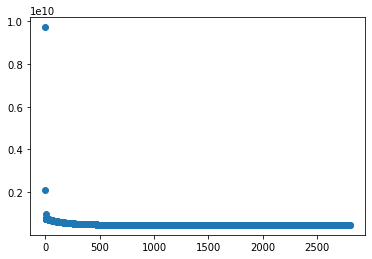

In [133]:

plt.scatter(list(range(2801)), cost_history[:2801])